### 기본 세팅

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
df = pd.read_csv("C:/workspace/data/seoul_PM/df_PM_pre.csv")
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),습도(%),증기압(hPa),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,47.541667,1.700000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,49.708333,2.175000,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,51.500000,3.250000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,55.583333,3.200000,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,60.500000,4.000000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,68.000000,3.054167,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,69.208333,3.441667,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,58.916667,2.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,54.375000,2.600000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [3]:
col_X1 = ['미세먼지(PM10)', '초미세먼지(PM2.5)', '기온(°C)', '강수량(mm)', '습도(%)', '적설(cm)']
col_X2 = list(df.columns[-16:])
col_X2
col_X = col_X1 + col_X2

### 인공신경망 실습

In [7]:
y = df['next_mask_need']
y

0       0
1       0
2       1
3       0
4       1
       ..
5452    1
5453    0
5454    0
5455    0
5456    0
Name: next_mask_need, Length: 5457, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_mask_need', ylabel='count'>

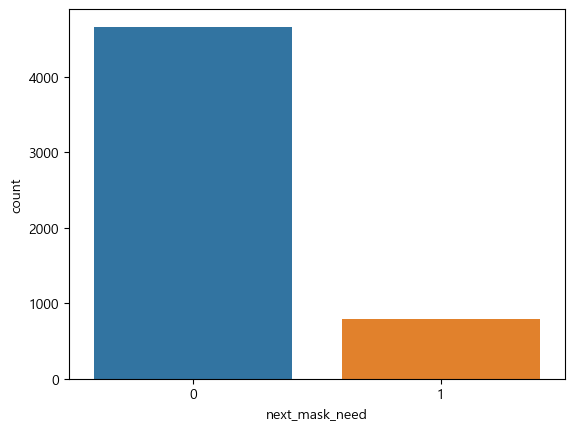

In [8]:
sns.countplot('next_mask_need', data=df)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=2).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=col_X)
y_samp = pd.DataFrame(data=y_sample, columns=['next_mask_need'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['next_mask_need'].value_counts()

0    794
1    794
Name: next_mask_need, dtype: int64

In [10]:
X = X_samp
y = y_samp

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(random_state=2)
model.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(random_state=2)

In [13]:
pred = model.predict(X_test)
print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))
# print("검증용 :", np.mean(pred = y_test))

학습용 : 0.8397839783978398
검증용 : 0.7484276729559748


<AxesSubplot:>

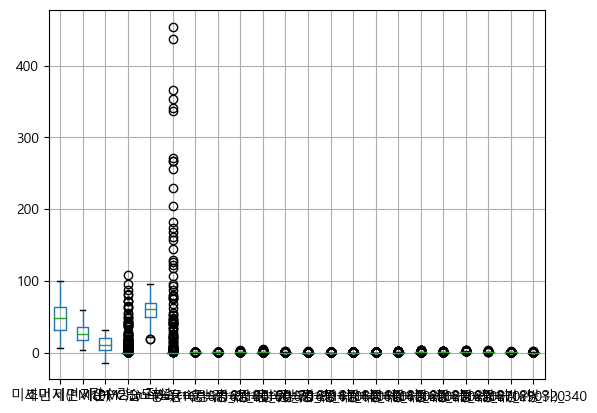

In [14]:
X_train.boxplot()

In [15]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정
# 인공신경망,딥러닝에서 자주 사용
# 변수의 범위를 왜곡하지 않음
# (특정값-최소값)/(최대값-최소값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때
# 40Kg  0으로 변환
# 120Kg 1로 변환
# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training
# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))
#Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)
# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

특성별 최소값
미세먼지(PM10)      0.0
초미세먼지(PM2.5)    0.0
기온(°C)          0.0
강수량(mm)         0.0
습도(%)           0.0
적설(cm)          0.0
풍속(16방위)_0      0.0
풍속(16방위)_20     0.0
풍속(16방위)_50     0.0
풍속(16방위)_70     0.0
풍속(16방위)_90     0.0
풍속(16방위)_110    0.0
풍속(16방위)_140    0.0
풍속(16방위)_160    0.0
풍속(16방위)_180    0.0
풍속(16방위)_200    0.0
풍속(16방위)_230    0.0
풍속(16방위)_250    0.0
풍속(16방위)_270    0.0
풍속(16방위)_290    0.0
풍속(16방위)_320    0.0
풍속(16방위)_340    0.0
dtype: float64
특성별 최대값
미세먼지(PM10)      1.0
초미세먼지(PM2.5)    1.0
기온(°C)          1.0
강수량(mm)         1.0
습도(%)           1.0
적설(cm)          1.0
풍속(16방위)_0      1.0
풍속(16방위)_20     1.0
풍속(16방위)_50     1.0
풍속(16방위)_70     1.0
풍속(16방위)_90     1.0
풍속(16방위)_110    1.0
풍속(16방위)_140    1.0
풍속(16방위)_160    1.0
풍속(16방위)_180    1.0
풍속(16방위)_200    1.0
풍속(16방위)_230    1.0
풍속(16방위)_250    1.0
풍속(16방위)_270    1.0
풍속(16방위)_290    1.0
풍속(16방위)_320    1.0
풍속(16방위)_340    1.0
dtype: float64
         미세먼지(PM10)  초미세먼지(PM2.5)        기온(°C)       강수량(mm)         습도(%

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


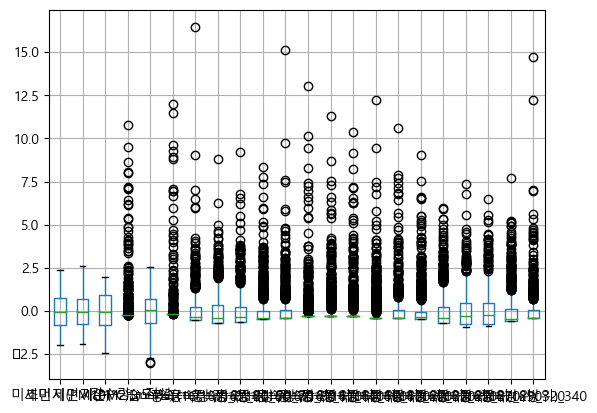

In [16]:
X_train_scaled.boxplot()
plt.show()

In [17]:
#표준화된 데이터로 다시 학습
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#정확도가 높아짐

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용: 0.9054905490549054
검증용: 0.7547169811320755


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test_scaled)
cm=confusion_matrix(y_test, pred)
cm

array([[175,  53],
       [ 64, 185]], dtype=int64)

In [19]:
df_cm=pd.DataFrame(cm, index=[0, 1],
columns=[0, 1])
df_cm

,0,1
0,175,53
1,64,185


<AxesSubplot:title={'center':'Confusion Matrix'}>

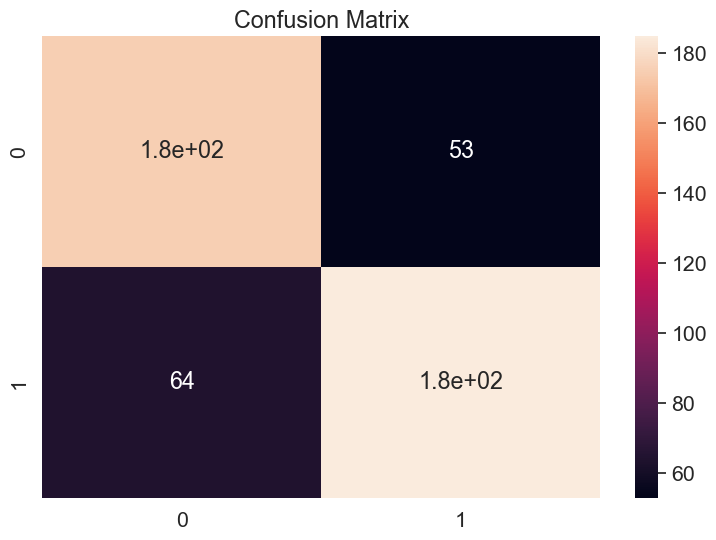

In [20]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

### 인공신경망 실습2

In [21]:
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),습도(%),증기압(hPa),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,47.541667,1.700000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,49.708333,2.175000,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,51.500000,3.250000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,55.583333,3.200000,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,60.500000,4.000000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,68.000000,3.054167,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,69.208333,3.441667,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,58.916667,2.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,54.375000,2.600000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [22]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample =RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=col_X )
y_samp = pd.DataFrame(data=y_sample,columns=['next_mask_need'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["next_mask_need"].value_counts()

0    794
1    794
Name: next_mask_need, dtype: int64

In [23]:
X = X_samp
y = y_samp

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=10)

In [25]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(random_state=0)

In [26]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
# print("검증용:",np.mean(pred == y_test))

학습용: 0.8212598425196851
검증용: 0.779874213836478


In [27]:
#데이터 전처리 0.0~1.0
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)
# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

         미세먼지(PM10)  초미세먼지(PM2.5)        기온(°C)       강수량(mm)         습도(%)  \
count  1.270000e+03  1.270000e+03  1.270000e+03  1.270000e+03  1.270000e+03   
mean  -7.329220e-16  6.217249e-16 -1.304294e-15  4.743799e-16  2.439169e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.005596e+00 -1.962624e+00 -2.468619e+00 -2.349878e-01 -3.062300e+00   
25%   -8.013350e-01 -8.040333e-01 -8.191014e-01 -2.349878e-01 -7.215800e-01   
50%   -4.632739e-04 -7.438993e-02 -4.907095e-02 -2.349878e-01  6.573240e-02   
75%    7.087254e-01  7.531189e-01  9.098102e-01 -2.349878e-01  6.567850e-01   
max    2.373370e+00  2.353965e+00  1.953230e+00  1.138159e+01  2.599681e+00   

             적설(cm)    풍속(16방위)_0   풍속(16방위)_20   풍속(16방위)_50   풍속(16방위)_70  \
count  1.270000e+03  1.270000e+03  1.270000e+03  1.270000e+03  1.270000e+03   
mean   7.587544e-16 -3.597297e-16  8.532108e-16 -1.154982e-15  4.704898e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

In [28]:
#표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
#최대 반복 횟수에 도달했다는 경고 : max_iter 반복횟수를 늘려야 함

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [29]:
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

학습용: 0.8984251968503937
검증용: 0.7924528301886793


In [30]:
# 최대 반복 횟수 max_iter를 200에서 5000으로 늘림
model = MLPClassifier(max_iter=1000,random_state=42)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용: 0.9984251968503937
검증용: 0.7452830188679245


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
# 은닉층을 2개로 늘림
model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용: 1.0
검증용: 0.7547169811320755


In [32]:
# 은닉층을 3개로 늘림
model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100,100],random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#더이상 개선되지 않음

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용: 1.0
검증용: 0.7515723270440252


In [33]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[119,  32],
       [ 47, 120]], dtype=int64)

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

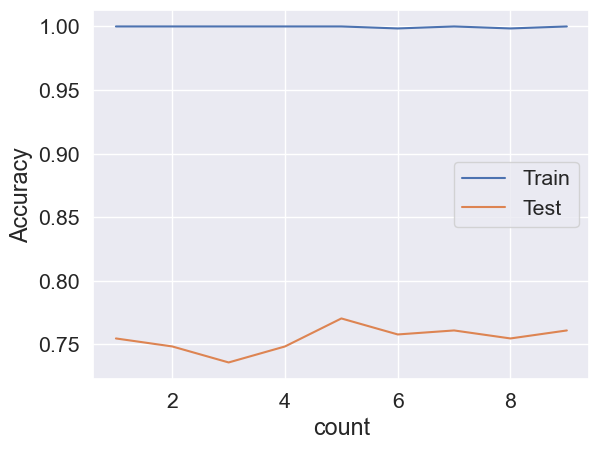

In [34]:
# 최적의 은닉노드 개수를 구하기 위한 실험
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=0,
        hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [35]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('idx:',idx)
print('최고정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx: 4
최고정확도: 0.7704402515723271
200 200


In [36]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=0)
model.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용:100.00%
검증용: 75.79%


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Keras 회귀분석

In [ ]:
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),습도(%),증기압(hPa),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,47.541667,1.700000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,49.708333,2.175000,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,51.500000,3.250000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,55.583333,3.200000,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,60.500000,4.000000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,68.000000,3.054167,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,69.208333,3.441667,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,58.916667,2.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,54.375000,2.600000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [42]:
X = df[col_X]
y = df['next_PM10']
y

0       35.655399
1       53.705927
2       78.231280
3       64.480598
4       78.442576
          ...    
5452    49.191594
5453    34.570833
5454    30.307906
5455    38.443462
5456    44.017628
Name: next_PM10, Length: 5457, dtype: float64

In [44]:
x_data = np.array(X, dtype=np.float32)
y_data = np.array(y, dtype=np.float32)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(1, input_shape=(22,)))
rmsprop = RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=rmsprop)

In [46]:
x_data

array([[ 3.68345566e+01,  1.31599998e+01, -6.33750010e+00, ...,
         2.42083335e+00,  7.91666657e-02,  1.91666663e-01],
       [ 3.56553993e+01,  1.60066662e+01, -3.72083330e+00, ...,
         7.83333361e-01,  2.33333334e-01,  0.00000000e+00],
       [ 5.37059250e+01,  2.50154800e+01,  8.66666675e-01, ...,
         2.29166672e-01,  0.00000000e+00,  1.04166664e-01],
       ...,
       [ 3.45708351e+01,  2.12327557e+01, -2.91666675e+00, ...,
         7.66666651e-01,  4.33333337e-01,  0.00000000e+00],
       [ 3.03079052e+01,  1.84841938e+01, -3.29583335e+00, ...,
         4.74999994e-01,  5.83333336e-02,  0.00000000e+00],
       [ 3.84434624e+01,  2.75769234e+01, -1.38333333e+00, ...,
         1.79166660e-01,  4.58333343e-02,  5.41666672e-02]], dtype=float32)

In [47]:
hist=model.fit(x_data, y_data, epochs=400)

Epoch 1/400
171/171 [==============================] - 1s 4ms/step - loss: 357.3640
Epoch 2/400
171/171 [==============================] - 1s 3ms/step - loss: 202.8384
Epoch 3/400
171/171 [==============================] - 1s 3ms/step - loss: 198.8945
Epoch 4/400
171/171 [==============================] - 1s 3ms/step - loss: 196.2373
Epoch 5/400
171/171 [==============================] - 1s 3ms/step - loss: 194.4023
Epoch 6/400
171/171 [==============================] - 1s 4ms/step - loss: 193.5816
Epoch 7/400
171/171 [==============================] - 1s 3ms/step - loss: 192.7876
Epoch 8/400
171/171 [==============================] - 1s 3ms/step - loss: 191.6993
Epoch 9/400
171/171 [==============================] - 1s 3ms/step - loss: 190.9682
Epoch 10/400
171/171 [==============================] - 1s 3ms/step - loss: 190.3805
Epoch 11/400
171/171 [==============================] - 1s 3ms/step - loss: 190.7621
Epoch 12/400
171/171 [==============================] - 1s 3ms/step - loss

In [48]:
print(hist.history.keys())

dict_keys(['loss'])


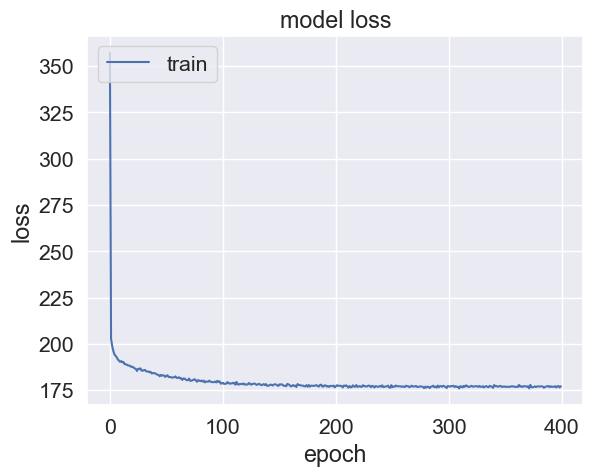

In [49]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

In [50]:
w, b =model.get_weights()
w, b

(array([[ 0.58633983],
        [-0.0604859 ],
        [-0.30579895],
        [ 0.00804857],
        [-0.03980604],
        [-0.01799001],
        [-7.762877  ],
        [ 0.3717775 ],
        [-4.5062184 ],
        [-3.9972236 ],
        [-6.5349755 ],
        [-6.266752  ],
        [-6.185267  ],
        [-4.5706778 ],
        [-0.6540618 ],
        [-2.426199  ],
        [ 1.252994  ],
        [ 2.2747593 ],
        [-2.7918527 ],
        [-3.5372255 ],
        [-4.5451884 ],
        [-4.0240164 ]], dtype=float32),
 array([30.560602], dtype=float32))

### Keras 회귀분석2

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [52]:
print(X_train.shape)
print(X_train.shape[1])

(4092, 22)
22


In [53]:
X_test.shape

(1365, 22)

In [54]:
y_train[0:10]

2546    28.619423
312     26.908923
240     30.306282
4784    54.050694
3975    27.556704
2283    71.261025
3057    71.180274
2556    42.650833
735     76.232846
4838    66.058511
Name: next_PM10, dtype: float64

<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 

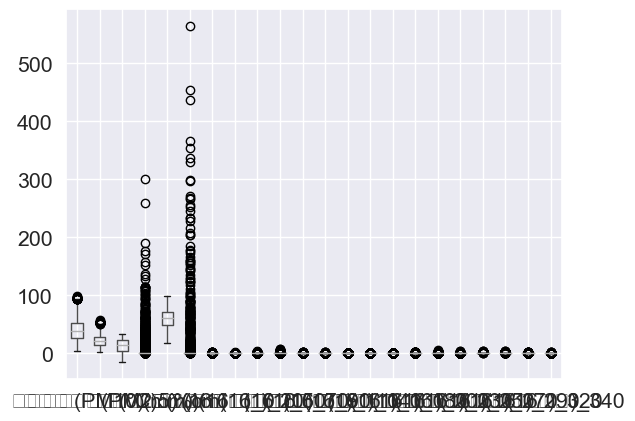

In [55]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

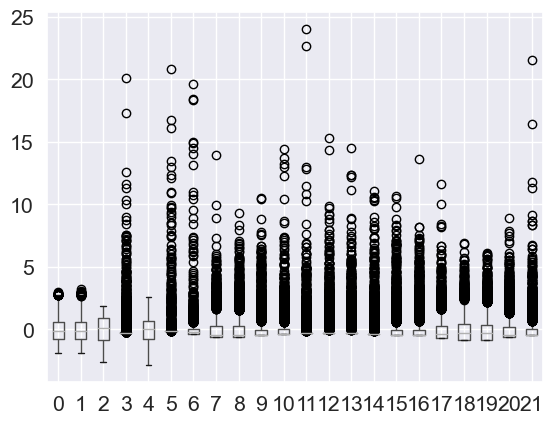

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()

In [57]:
from keras import models, layers
#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #relu
    model.add(layers.Dense(64, activation='relu',
    input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우
    # 활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))
    #mse 손실 함수를 사용하여 컴파일
    #mse : 평균 제곱 오차(mean squared error) -
    # 예측값과 실제값의 거리의 제곱
    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer='rmsprop', loss='mse',
    metrics=['mae'])
    return model
model = build_model()

In [58]:
hist=model.fit(X_train_scaled, y_train,
epochs=100, batch_size=64, verbose=1)

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 1418.8564 - mae: 32.5036
Epoch 2/100
64/64 [==============================] - 0s 6ms/step - loss: 458.5149 - mae: 16.7085
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 276.2966 - mae: 12.8792
Epoch 4/100
64/64 [==============================] - 0s 6ms/step - loss: 238.3270 - mae: 11.9029
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 219.7807 - mae: 11.4428
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 208.7265 - mae: 11.1775
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 201.1505 - mae: 10.9476
Epoch 8/100
64/64 [==============================] - 0s 6ms/step - loss: 194.8866 - mae: 10.7880
Epoch 9/100
64/64 [==============================] - 0s 6ms/step - loss: 190.2730 - mae: 10.6243
Epoch 10/100
64/64 [==============================] - 0s 5ms/step - loss: 187.0612 - mae: 10.5750
Epoch 11/100
64/64 [========

In [59]:
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae)

43/43 [==============================] - 0s 3ms/step - loss: 171.1767 - mae: 10.0775
171.17666625976562
10.077472686767578


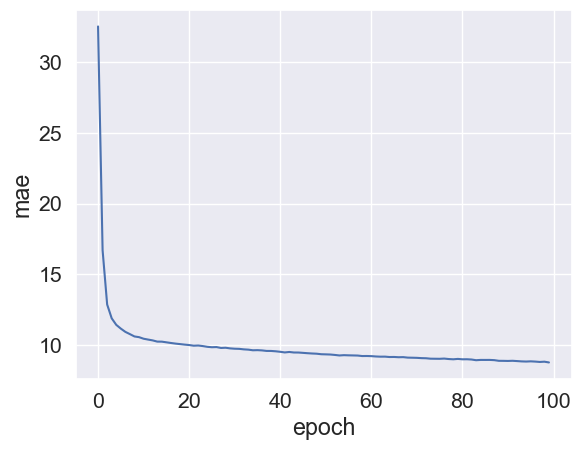

In [60]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1472      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________
